<a href="https://colab.research.google.com/github/avanish04/online-retail-customer-segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# Importing Dataset and important libraries

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
#importing dataset
dataset= pd.read_excel('/content/drive/MyDrive/Capstone projects/Customer segmentation /Copy of Online Retail.xlsx')

# Cleaning of Data


In [23]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
dataset.shape

(541909, 8)

**Dataset contains 8 features and 541909 observations**

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**From the above result we can see that CustomerID and Description feature contain some null values. In this scenerio we have to drop these observations because we can not fill them randomly.**

In [26]:
# dropping nan values
dataset.dropna(inplace= True)

In [27]:
dataset.shape

(406829, 8)

**After removing the NaN values now, Dataset has 406829 observations left.**

**As given in the problem statement which invoiceNo contain 'c'(which means cancelled), then we have to drop these observations also.**

In [28]:
dataset['InvoiceNo']=dataset['InvoiceNo'].astype('str')
dataset=dataset[~dataset['InvoiceNo'].str.contains('C')]

In [29]:
dataset.shape

(397924, 8)

**At the end, after removing observations contain cancelled order, now dataset have 397924 observations.**




# EDA

In [30]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [31]:
dataset.describe(percentiles=[.25, .50, .75, .95,.99])

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
95%,36.000000,8.500000,17912.000000
99%,120.000000,14.950000,18211.000000
max,80995.000000,8142.750000,18287.000000


**from the above we can say that Quantity and unitprice contain outliers**

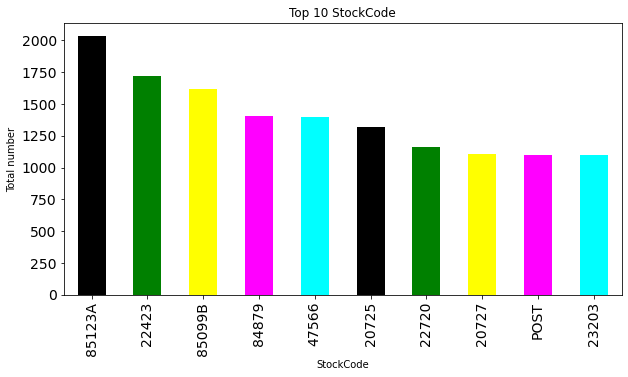

In [32]:
#Top 10 Stockcode which sold maximum(volume-wised)
ax = dataset['StockCode'].value_counts().sort_values(ascending=False)[0:10].plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color=['black', 'green', 'yellow','magenta','cyan','black', 'green', 'yellow','magenta','cyan'])
plt.title('Top 10 StockCode')
plt.xlabel('StockCode')

plt.ylabel('Total number');

**From the above bar graph stock code 85123A sold the highest**


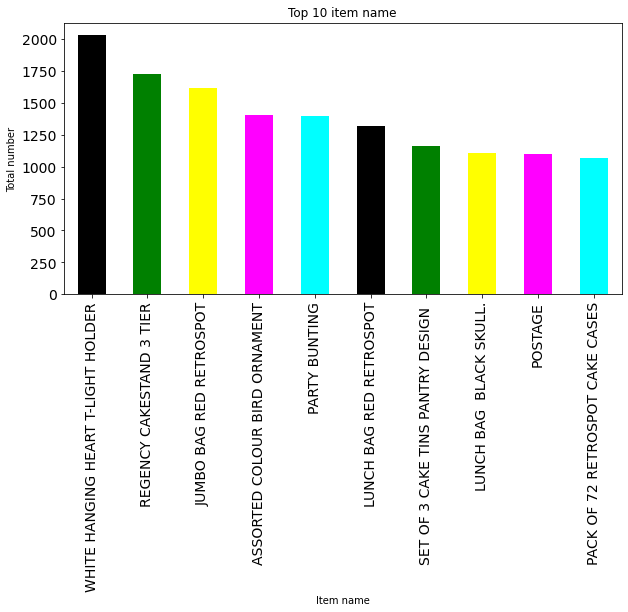

In [33]:
#Top 10 item which sold maximum(volume-wised)
ax = dataset['Description'].value_counts().sort_values(ascending=False)[0:10].plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color=['black', 'green', 'yellow','magenta','cyan','black', 'green', 'yellow','magenta','cyan'])

plt.title('Top 10 item name')
plt.xlabel('Item name')

plt.ylabel('Total number');

**White Hanging heart T-Light holder item sold the highest amongs the other items**

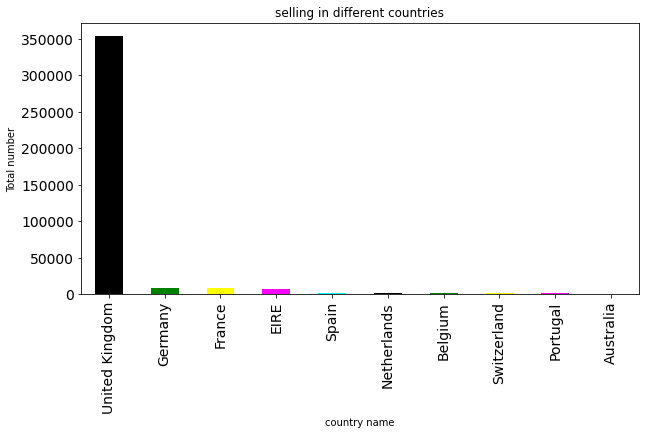

In [34]:
#Top 10 item which sold maximum(volume-wised)
ax = dataset['Country'].value_counts().sort_values(ascending=False)[0:10].plot.bar(
    figsize = (10,5),
    fontsize = 14,
    color=['black', 'green', 'yellow','magenta','cyan','black', 'green', 'yellow','magenta','cyan'])
plt.title('selling in different countries')
plt.xlabel('country name')

plt.ylabel('Total number');

**from the above result, Maximum sell of the store happened in UK**

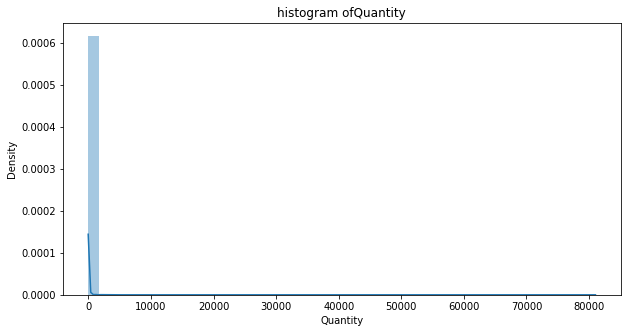

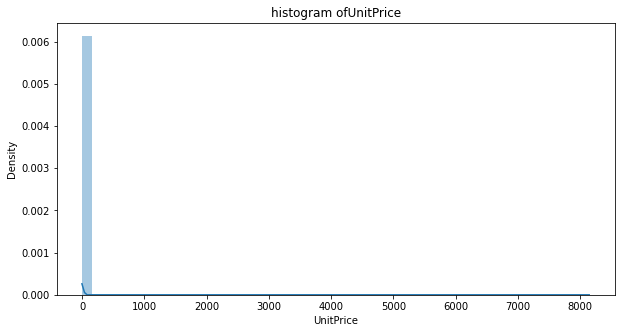

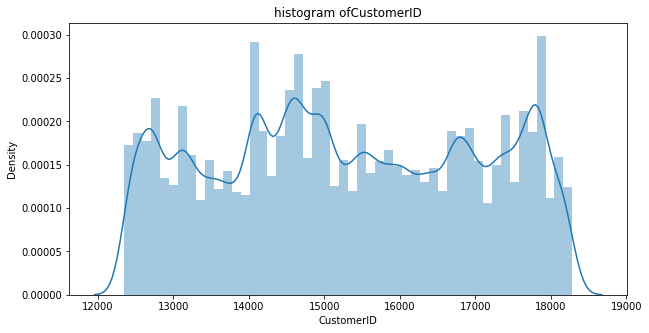

''

In [35]:
for i in list(dataset.describe().columns):
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.title('histogram of'+i)
  ax=sns.distplot((dataset[i]) )
  plt.show()
;

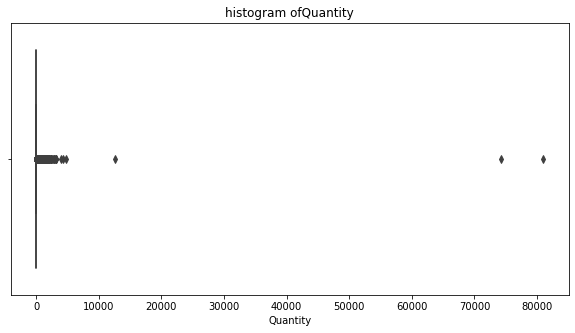

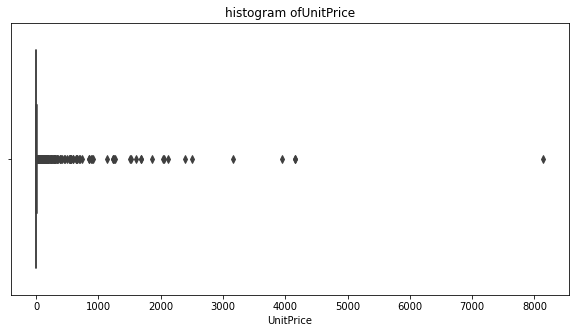

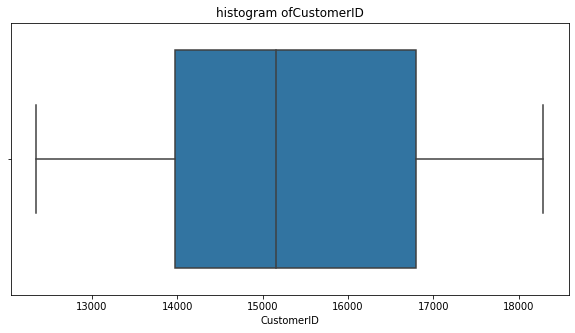

''

In [36]:
for i in list(dataset.describe().columns):
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.title('histogram of'+i)
  ax=sns.boxplot((dataset[i]) )
  plt.show()
;